## Find a dataset in the form of (x,y) and then apply K-Mean clustering and find number of Clusters using Elbow method.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

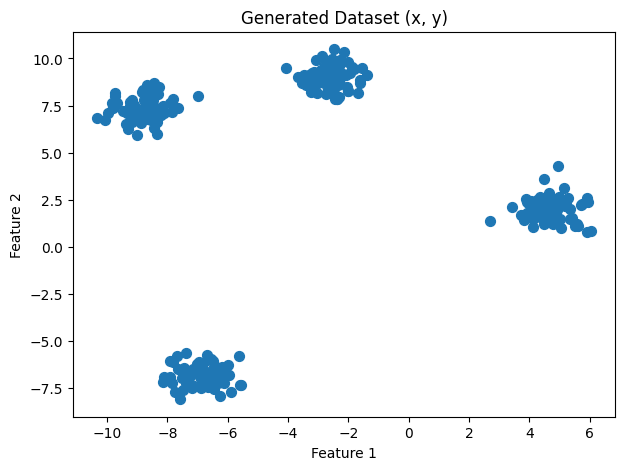

In [9]:
# 1. Generate synthetic dataset (x, y)

X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42) # make_blobs creates clusters of points for demonstration

# Visualize the dataset
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Dataset (x, y)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

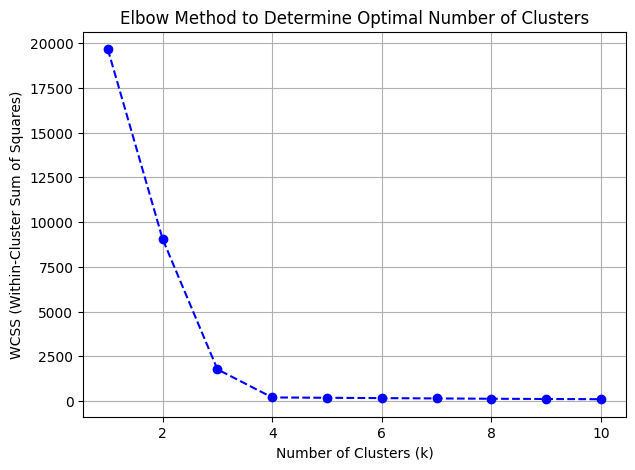

In [10]:
# 2. Use the Elbow Method to find optimal number of clusters
wcss = []  # Within-cluster sum of squares

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ = WCSS

# Plot the Elbow graph
plt.figure(figsize=(7, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.title("Elbow Method to Determine Optimal Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Within-Cluster Sum of Squares)")
plt.grid(True)
plt.show()

In [11]:
# 3. From the elbow plot, choose k = 4
k_optimal = 4

# 4. Apply K-Means with optimal k
kmeans = KMeans(n_clusters=k_optimal, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

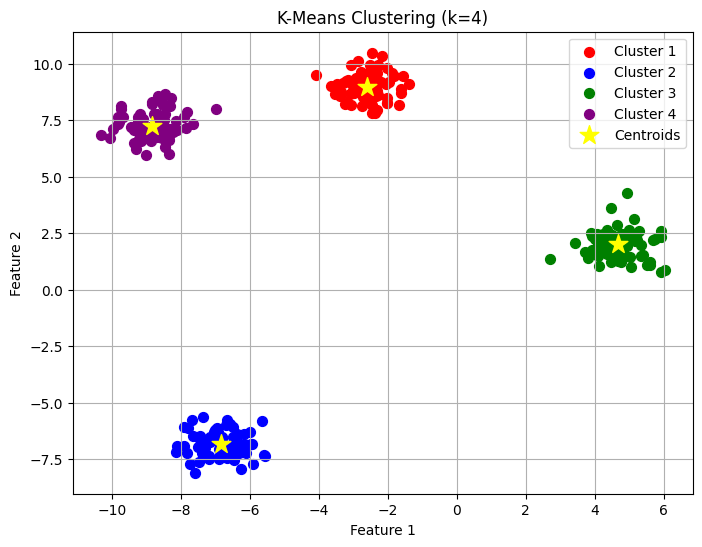

In [12]:
# 5. Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, color='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, color='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, color='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=50, color='purple', label='Cluster 4')

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, color='yellow', marker='*', label='Centroids')

plt.title("K-Means Clustering (k=4)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# 6. Print cluster centers
print("Cluster Centers (Centroids):")
print(kmeans.cluster_centers_)

Cluster Centers (Centroids):
[[-2.60516878  8.99280115]
 [-6.85126211 -6.85031833]
 [ 4.68687447  2.01434593]
 [-8.83456141  7.24430734]]
